# Plot how the number of stations differs across Belgian provinces using a color-coded heat map. Do the same while adjusting for the number of inhabitants.

In [5]:
import src.data_processing.data as data
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [6]:
provinces = data.provinces
stations = data.stations
inhabitants = data.inhabitants_per_province


Get the number of stations per province

In [7]:
provinces_count = df = pd.DataFrame(columns=['province', 'station'])
for index, row in stations.iterrows():
        for index2, row2 in provinces.iterrows():
                if row2['geometry'].contains(Point(row['longitude'], row['latitude'])):
                    provinces_count = pd.concat([provinces_count, pd.DataFrame([[row['name'], row2['NE_Name']]], columns=['station', 'province'])])
                    # provinces_count = provinces_count.append({'station': row['name'], 'province': row2['NE_Name']}, ignore_index=True)
                     # print(row['name'] + ' is located in ' + row2['NE_Name'])
provinces_count_temp = provinces_count.copy()
# province_count = pd.DataFrame(provinces_count["province"].value_counts())
provinces_count['count'] = provinces_count.groupby('province')['province'].transform('count')
del provinces_count['station']
provinces_count = provinces_count.drop_duplicates()
provinces_count = provinces_count.rename(index=str, columns={'province': 'NE_Name'})
provinces_count


,NE_Name,count
0,Oost-Vlaanderen,82
0,Vlaams Brabant,65
0,West-Vlaanderen,36
0,Henegouwen,93
0,Limburg,21
0,Luik,64
0,Namen,54
0,Antwerpen,55
0,Brussel,34
0,Waals Brabant,28


We can check if all stations are assigned to a province

In [8]:
provinces_count_temp #562 rows

,province,station
0,Oost-Vlaanderen,Aalst
0,Oost-Vlaanderen,Aalst-Kerrebroek
0,Oost-Vlaanderen,Aalter
0,Vlaams Brabant,Aarschot
0,West-Vlaanderen,Aarsele
...,...,...
0,Limburg,Zolder
0,Limburg,Zonhoven
0,Oost-Vlaanderen,Zottegem
0,Antwerpen,Zwijndrecht


In [9]:
provinces_count_temp.merge(stations, left_on="station", right_on = "name", how = "outer" ) # 569 rows

,province,station,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,Oost-Vlaanderen,Aalst,008895000,Aalst,be,4.039653,50.942813,157.425373,300.0
1,Oost-Vlaanderen,Aalst-Kerrebroek,008895125,Aalst-Kerrebroek,be,4.024407,50.948377,7.731343,300.0
2,Oost-Vlaanderen,Aalter,008891140,Aalter,be,3.447848,51.092295,188.276119,240.0
3,Vlaams Brabant,Aarschot,008833209,Aarschot,be,4.824043,50.984406,171.664179,240.0
4,West-Vlaanderen,Aarsele,008892288,Aarsele,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...,...,...
564,NaN,NaN,008879004,Erquelinnes-Frontière,be,4.107929,50.302330,5.283582,120.0
565,NaN,NaN,008849072,Gouvy-Frontiere,be,5.968613,50.171653,29.656716,120.0
566,NaN,NaN,008849023,Hergenrath-Frontiere,be,6.041269,50.718955,45.268657,120.0
567,NaN,NaN,008889011,Mouscron-Frontiere,be,3.196086,50.721716,43.970149,120.0


We see that 7 stations that are almost exactly on the border (frontiere = border in french) , are not assigned to a province:


In [10]:
provinces_count_temp.merge(stations, left_on="station", right_on = "name", how = "outer" ).tail(7)

,province,station,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
562,NaN,NaN,008869047,Athus-Frontiere,be,5.824932,49.551749,108.126866,120.0
563,NaN,NaN,008889045,Blandain-Frontiere,be,3.263730,50.617490,49.820896,120.0
564,NaN,NaN,008879004,Erquelinnes-Frontière,be,4.107929,50.302330,5.283582,120.0
565,NaN,NaN,008849072,Gouvy-Frontiere,be,5.968613,50.171653,29.656716,120.0
566,NaN,NaN,008849023,Hergenrath-Frontiere,be,6.041269,50.718955,45.268657,120.0
567,NaN,NaN,008889011,Mouscron-Frontiere,be,3.196086,50.721716,43.970149,120.0
568,NaN,NaN,008889003,Quevy-frontiere,be,3.908753,50.327710,5.955224,120.0


We manually increase the count of the provinces these stations are in by 1 :
Athus -> Luxemburg
Blandain -> Henegouwen
Erquilinnes -> Henegouwen
Gouvy-> Luxemburg
Hergenrath -> Luik
Mouscron -> Henegouwen
Quevy -> Henegouwen

In [11]:
provinces_count


,NE_Name,count
0,Oost-Vlaanderen,82
0,Vlaams Brabant,65
0,West-Vlaanderen,36
0,Henegouwen,93
0,Limburg,21
0,Luik,64
0,Namen,54
0,Antwerpen,55
0,Brussel,34
0,Waals Brabant,28


In [12]:
provinces_count.loc[provinces_count["NE_Name"] == "Luik", "count"] += 1
provinces_count.loc[provinces_count["NE_Name"] == "Henegouwen", "count"] += 4
provinces_count.loc[provinces_count["NE_Name"] == "Luxemburg", "count"] += 2
provinces_count

,NE_Name,count
0,Oost-Vlaanderen,82
0,Vlaams Brabant,65
0,West-Vlaanderen,36
0,Henegouwen,97
0,Limburg,21
0,Luik,65
0,Namen,54
0,Antwerpen,55
0,Brussel,34
0,Waals Brabant,28


Merge provinces and provinces_count

In [13]:
provinces_count["count"] = provinces_count["count"].astype(float)
provinces = provinces.merge(provinces_count, on='NE_Name')
provinces


,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,count
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",55.0
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",34.0
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",65.0
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",28.0
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",36.0
5,6,40000,Oost-Vlaanderen,Vlaanderen,Flandres Oriental|Fiandra Orientale|Flandes Or...,Province,Flandre Orientale,Oost-Vlaanderen,"POLYGON ((4.31166 51.29250, 4.31431 51.29112, ...",82.0
6,7,50000,Hainaut,Wallonie,Henegouwen|Hennegau,Province,Hainaut,Henegouwen,"MULTIPOLYGON (((3.71031 50.78190, 3.71065 50.7...",97.0
7,8,60000,Liège,Wallonie,Luik|Liegi|Lieja|Lüttich,Province,Liège,Luik,"POLYGON ((6.13338 50.12956, 6.13309 50.12968, ...",65.0
8,9,70000,Limburg,Vlaanderen,Limbourg|Limburgo,Province,Limbourg,Limburg,"MULTIPOLYGON (((5.77703 50.78285, 5.77662 50.7...",21.0
9,10,80000,Luxembourg,Wallonie,Lussemburgo|Luxemburg|Luxemburgo,Province,Luxembourg,Luxemburg,"POLYGON ((5.43891 50.42170, 5.43908 50.42165, ...",32.0


Heatmap of provinces with weight number of stations

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_76076/1067909238.py:6: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


(2.35258577993626, 6.60121980520596, 49.396471201779654, 51.605524424194044)

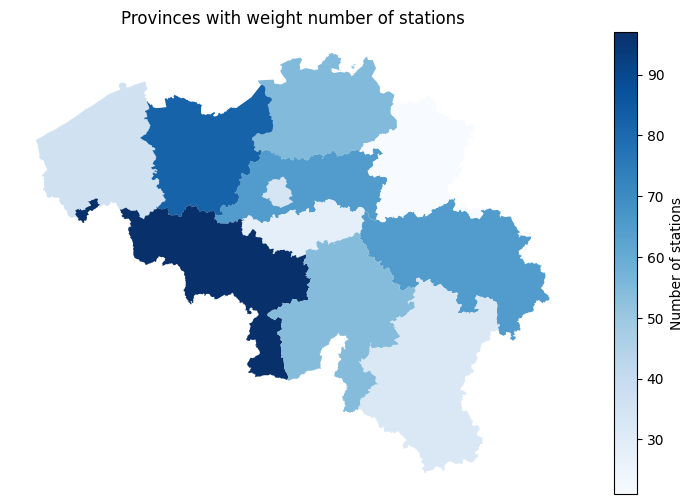

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 6))
provinces.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax)
plt.title(label = "Provinces with weight number of stations")
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=provinces['count'].min(), vmax=provinces['count'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Number of stations')
ax.axis('off')


In [15]:
inhabitants = inhabitants.rename(index = str, columns = {"Province" : "NE_Name"})
inhabitants['Inhabitants']= inhabitants['Inhabitants'].astype(float)
provinces = provinces.merge(inhabitants, on = "NE_Name")
provinces


,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,count,Inhabitants
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",55.0,1875524.0
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",34.0,1219970.0
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",65.0,1162084.0
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",28.0,407397.0
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",36.0,1203312.0
5,6,40000,Oost-Vlaanderen,Vlaanderen,Flandres Oriental|Fiandra Orientale|Flandes Or...,Province,Flandre Orientale,Oost-Vlaanderen,"POLYGON ((4.31166 51.29250, 4.31431 51.29112, ...",82.0,1531745.0
6,7,50000,Hainaut,Wallonie,Henegouwen|Hennegau,Province,Hainaut,Henegouwen,"MULTIPOLYGON (((3.71031 50.78190, 3.71065 50.7...",97.0,1345947.0
7,8,60000,Liège,Wallonie,Luik|Liegi|Lieja|Lüttich,Province,Liège,Luik,"POLYGON ((6.13338 50.12956, 6.13309 50.12968, ...",65.0,1109067.0
8,9,70000,Limburg,Vlaanderen,Limbourg|Limburgo,Province,Limbourg,Limburg,"MULTIPOLYGON (((5.77703 50.78285, 5.77662 50.7...",21.0,880397.0
9,10,80000,Luxembourg,Wallonie,Lussemburgo|Luxemburg|Luxemburgo,Province,Luxembourg,Luxemburg,"POLYGON ((5.43891 50.42170, 5.43908 50.42165, ...",32.0,288722.0


Heatmap of provinces with weight Inhabitants

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_76076/1117416233.py:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


Text(0.5, 1.0, 'Provinces with weight number of inhabitants')

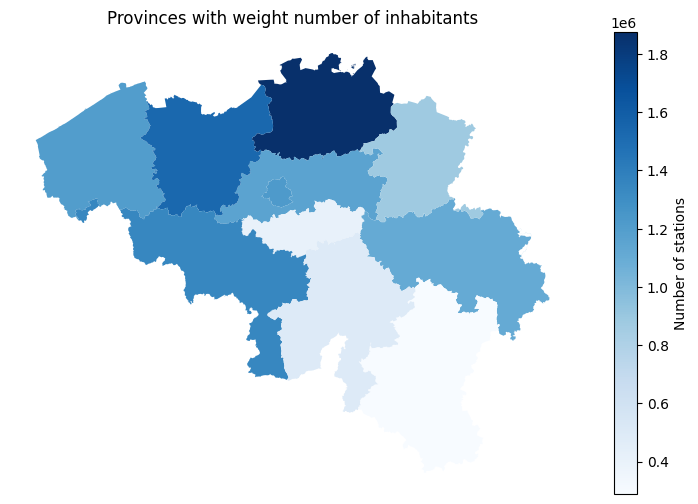

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 6))
provinces.plot(column='Inhabitants', cmap='Blues', linewidth=0.8, ax=ax)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=provinces['Inhabitants'].min(), vmax=provinces['Inhabitants'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Number of stations')
ax.axis('off')
plt.title(label = "Provinces with weight number of inhabitants")

In [17]:
provinces["stations_adjusted"] = provinces["count"] / provinces["Inhabitants"]
provinces

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,count,Inhabitants,stations_adjusted
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",55.0,1875524.0,0.000029
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",34.0,1219970.0,0.000028
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",65.0,1162084.0,0.000056
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",28.0,407397.0,0.000069
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",36.0,1203312.0,0.000030
5,6,40000,Oost-Vlaanderen,Vlaanderen,Flandres Oriental|Fiandra Orientale|Flandes Or...,Province,Flandre Orientale,Oost-Vlaanderen,"POLYGON ((4.31166 51.29250, 4.31431 51.29112, ...",82.0,1531745.0,0.000054
6,7,50000,Hainaut,Wallonie,Henegouwen|Hennegau,Province,Hainaut,Henegouwen,"MULTIPOLYGON (((3.71031 50.78190, 3.71065 50.7...",97.0,1345947.0,0.000072
7,8,60000,Liège,Wallonie,Luik|Liegi|Lieja|Lüttich,Province,Liège,Luik,"POLYGON ((6.13338 50.12956, 6.13309 50.12968, ...",65.0,1109067.0,0.000059
8,9,70000,Limburg,Vlaanderen,Limbourg|Limburgo,Province,Limbourg,Limburg,"MULTIPOLYGON (((5.77703 50.78285, 5.77662 50.7...",21.0,880397.0,0.000024
9,10,80000,Luxembourg,Wallonie,Lussemburgo|Luxemburg|Luxemburgo,Province,Luxembourg,Luxemburg,"POLYGON ((5.43891 50.42170, 5.43908 50.42165, ...",32.0,288722.0,0.000111


Heatmap of provinces with weight number of stations divided by the number of inhabitants

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_76076/873016678.py:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


Text(0.5, 1.0, 'Provinces with weight number of stations adjusted by number of inhabitants')

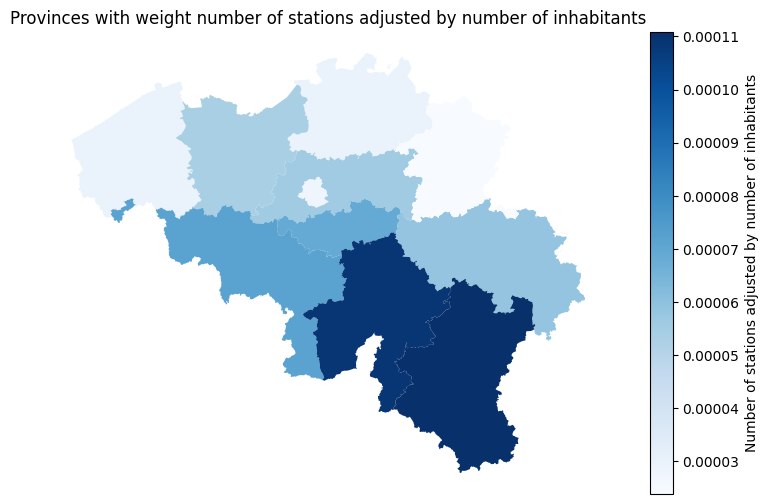

In [18]:
fig, ax = plt.subplots(1, figsize=(10, 6))
provinces.plot(column='stations_adjusted', cmap='Blues', linewidth=0.8, ax=ax)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=provinces['stations_adjusted'].min(), vmax=provinces['stations_adjusted'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Number of stations adjusted by number of inhabitants')
ax.axis('off')
plt.title(label ="Provinces with weight number of stations adjusted by number of inhabitants")

Plot the stations on the map

In [19]:
dict = {'Name': stations["name"], 'lat': stations["latitude"], 'lon': stations["longitude"]}
stations_df = pd.DataFrame(dict, columns = ['Name', 'lat', 'lon'])
stations_df

,Name,lat,lon
3,Aalst,50.942813,4.039653
4,Aalst-Kerrebroek,50.948377,4.024407
5,Aalter,51.092295,3.447848
6,Aarschot,50.984406,4.824043
7,Aarsele,50.984460,3.418363
...,...,...,...
669,Zolder,51.033548,5.329900
670,Zonhoven,50.989557,5.348815
671,Zottegem,50.869102,3.814410
673,Zwijndrecht,51.214108,4.329780


# From here on we do some extra analysis

# 1. Plot a heatmap adjusted to the number of travelers per province

In [20]:
travelers = data.travelers
travelers


,Unnamed: 0,Station,week,saturday,sunday,sum
0,0,aalst,6444.0,1768.0,1592.0,9804.0
1,1,aalst-kerrebroek,27.0,0.0,0.0,NaN
2,2,aalter,2288.0,1055.0,855.0,4198.0
3,3,aarschot,6270.0,1954.0,1395.0,9619.0
4,4,aarsele,34.0,0.0,0.0,NaN
...,...,...,...,...,...,...
548,548,zingem,523.0,98.0,86.0,707.0
549,549,zolder,123.0,38.0,37.0,198.0
550,550,zonhoven,67.0,29.0,19.0,115.0
551,551,zottegem,4936.0,986.0,931.0,6853.0


In [21]:
stations["name"] = stations["name"].str.lower()
travelers = travelers.merge(stations, left_on = "Station", right_on ="name")
travelers

,Unnamed: 0,Station,week,saturday,sunday,sum,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,0,aalst,6444.0,1768.0,1592.0,9804.0,008895000,aalst,be,4.039653,50.942813,157.425373,300.0
1,1,aalst-kerrebroek,27.0,0.0,0.0,NaN,008895125,aalst-kerrebroek,be,4.024407,50.948377,7.731343,300.0
2,2,aalter,2288.0,1055.0,855.0,4198.0,008891140,aalter,be,3.447848,51.092295,188.276119,240.0
3,3,aarschot,6270.0,1954.0,1395.0,9619.0,008833209,aarschot,be,4.824043,50.984406,171.664179,240.0
4,4,aarsele,34.0,0.0,0.0,NaN,008892288,aarsele,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,548,zingem,523.0,98.0,86.0,707.0,008892635,zingem,be,3.646384,50.908025,37.776119,300.0
549,549,zolder,123.0,38.0,37.0,198.0,008832250,zolder,be,5.329900,51.033548,30.910448,300.0
550,550,zonhoven,67.0,29.0,19.0,115.0,008832334,zonhoven,be,5.348815,50.989557,30.910448,300.0
551,551,zottegem,4936.0,986.0,931.0,6853.0,008895208,zottegem,be,3.814410,50.869102,161.223881,240.0


In [22]:
provinces_travelers = df = pd.DataFrame(columns=['province', 'travelers'])
for index, row in travelers.iterrows():
        for index2, row2 in provinces.iterrows():
                if row2['geometry'].contains(Point(row['longitude'], row['latitude'])):
                 provinces_travelers = pd.concat([provinces_travelers, pd.DataFrame([[row2['NE_Name'], row['sum']]], columns=['province', 'travelers'])])
provinces_travelers


,province,travelers
0,Oost-Vlaanderen,9804.0
0,Oost-Vlaanderen,NaN
0,Oost-Vlaanderen,4198.0
0,Vlaams Brabant,9619.0
0,West-Vlaanderen,NaN
...,...,...
0,Oost-Vlaanderen,707.0
0,Limburg,198.0
0,Limburg,115.0
0,Oost-Vlaanderen,6853.0


In [23]:
provinces_travelers['sum'] = provinces_travelers.groupby('province')['travelers'].transform('sum')
del provinces_travelers['travelers']
provinces_travelers = provinces_travelers.drop_duplicates()
provinces_travelers = provinces_travelers.rename(index=str, columns={'province': 'NE_Name'})
provinces_travelers


,NE_Name,sum
0,Oost-Vlaanderen,241935.0
0,Vlaams Brabant,182179.0
0,West-Vlaanderen,131962.0
0,Henegouwen,126862.0
0,Limburg,29030.0
0,Luik,92091.0
0,Namen,75666.0
0,Antwerpen,235672.0
0,Brussel,386438.0
0,Waals Brabant,92220.0


In [24]:
provinces = provinces.merge(provinces_travelers, on = "NE_Name")

We can clearly see that even though brussels is the smallest city, the number of travelers is the highest

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_76076/1015716493.py:6: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


(2.35258577993626, 6.60121980520596, 49.396471201779654, 51.605524424194044)

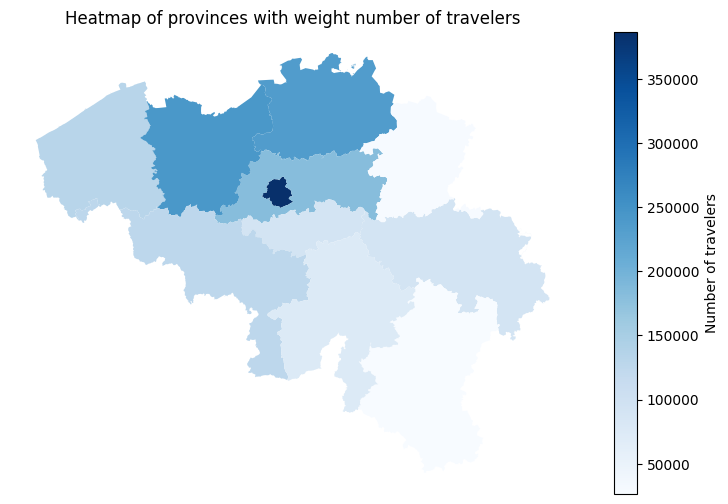

In [25]:
fig, ax = plt.subplots(1, figsize=(10, 6))
provinces.plot(column='sum', cmap='Blues', linewidth=0.8, ax=ax)
plt.title(label = "Heatmap of provinces with weight number of travelers")
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=provinces_travelers['sum'].min(), vmax=provinces_travelers['sum'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Number of travelers')
ax.axis('off')



2. Heatmap of the number of stations , adjusted by the number of travelers

In [26]:
provinces["count/sum"] = provinces["count"]/ provinces["sum"]
provinces

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,count,Inhabitants,stations_adjusted,sum,count/sum
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",55.0,1875524.0,0.000029,235672.0,0.000233
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",34.0,1219970.0,0.000028,386438.0,0.000088
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",65.0,1162084.0,0.000056,182179.0,0.000357
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",28.0,407397.0,0.000069,92220.0,0.000304
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",36.0,1203312.0,0.000030,131962.0,0.000273
5,6,40000,Oost-Vlaanderen,Vlaanderen,Flandres Oriental|Fiandra Orientale|Flandes Or...,Province,Flandre Orientale,Oost-Vlaanderen,"POLYGON ((4.31166 51.29250, 4.31431 51.29112, ...",82.0,1531745.0,0.000054,241935.0,0.000339
6,7,50000,Hainaut,Wallonie,Henegouwen|Hennegau,Province,Hainaut,Henegouwen,"MULTIPOLYGON (((3.71031 50.78190, 3.71065 50.7...",97.0,1345947.0,0.000072,126862.0,0.000765
7,8,60000,Liège,Wallonie,Luik|Liegi|Lieja|Lüttich,Province,Liège,Luik,"POLYGON ((6.13338 50.12956, 6.13309 50.12968, ...",65.0,1109067.0,0.000059,92091.0,0.000706
8,9,70000,Limburg,Vlaanderen,Limbourg|Limburgo,Province,Limbourg,Limburg,"MULTIPOLYGON (((5.77703 50.78285, 5.77662 50.7...",21.0,880397.0,0.000024,29030.0,0.000723
9,10,80000,Luxembourg,Wallonie,Lussemburgo|Luxemburg|Luxemburgo,Province,Luxembourg,Luxemburg,"POLYGON ((5.43891 50.42170, 5.43908 50.42165, ...",32.0,288722.0,0.000111,26503.0,0.001207


/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_76076/3439717088.py:6: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


(2.35258577993626, 6.60121980520596, 49.396471201779654, 51.605524424194044)

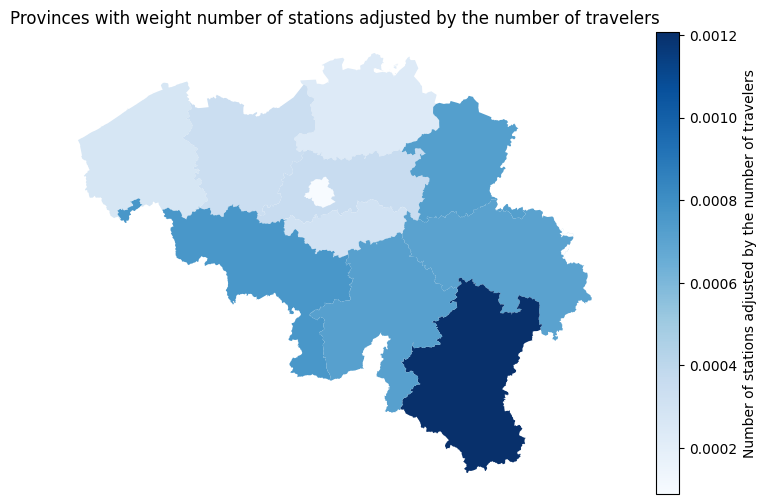

In [27]:
fig, ax = plt.subplots(1, figsize=(10, 6))
provinces.plot(column='count/sum', cmap='Blues', linewidth=0.8, ax=ax)
plt.title(label = "Provinces with weight number of stations adjusted by the number of travelers")
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=provinces['count/sum'].min(), vmax=provinces['count/sum'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Number of stations adjusted by the number of travelers')
ax.axis('off')



In [37]:
satisfaction = data.satisfaction
satisfaction

,Unnamed: 0,station,Avg Satisfaction
0,0,courcelles-motte,3.63
1,1,roux,13.58
2,2,ronet-formation,55.84
4,4,chatelet-formation,62.61
5,5,marchienne-au-pont,25.93
...,...,...,...
616,616,antwerpen-w.h.-b.kallo,29.81
617,617,vielsalm,51.74
618,618,gouvy,67.90
619,619,schaarbeek-perron vorming,53.30


In [38]:
satisfaction =satisfaction.merge(stations, left_on = "station", right_on = "name")
satisfaction

,Unnamed: 0,station,Avg Satisfaction,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,0,courcelles-motte,3.63,008871225,courcelles-motte,be,4.400534,50.462007,102.895522,300.0
1,1,roux,13.58,008871217,roux,be,4.393199,50.443112,102.895522,300.0
2,5,marchienne-au-pont,25.93,008871100,marchienne-au-pont,be,4.394223,50.412171,185.567164,300.0
3,6,luttre,34.73,008871308,luttre,be,4.384120,50.505856,130.470149,300.0
4,7,obaix-buzet,16.25,008871332,obaix-buzet,be,4.363570,50.535206,89.208955,300.0
...,...,...,...,...,...,...,...,...,...,...
524,613,rivage,39.72,008842705,rivage,be,5.587631,50.483285,56.634328,300.0
525,614,neerpelt,67.49,008832615,neerpelt,be,5.437170,51.222369,34.186567,300.0
526,615,melreux-hotton,59.09,008864436,melreux-hotton,be,5.440136,50.283670,30.738806,300.0
527,617,vielsalm,51.74,008845146,vielsalm,be,5.909211,50.278933,23.507463,300.0


In [41]:
provinces_satisfaction = df = pd.DataFrame(columns=['province', 'satisfaction'])
for index, row in satisfaction.iterrows():
        for index2, row2 in provinces.iterrows():
                if row2['geometry'].contains(Point(row['longitude'], row['latitude'])):
                 provinces_satisfaction = pd.concat([provinces_travelers, pd.DataFrame([[row2['NE_Name'], row['Avg Satisfaction']]], columns=['province', 'travelers'])])
provinces_satisfaction


,NE_Name,sum,province,travelers
0,Oost-Vlaanderen,241935.0,NaN,NaN
0,Vlaams Brabant,182179.0,NaN,NaN
0,West-Vlaanderen,131962.0,NaN,NaN
0,Henegouwen,126862.0,NaN,NaN
0,Limburg,29030.0,NaN,NaN
...,...,...,...,...
0,NaN,NaN,Limburg,67.49
0,NaN,NaN,Luxemburg,59.09
0,NaN,NaN,Luxemburg,51.74
0,NaN,NaN,Luxemburg,67.90
